## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**List of the available styles to use for plots**

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Data Preprocessing

##### Loading the FIFA 20 dataset

In [3]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [5]:
len(data)

18278

<strong>Removing unecessary columns</strong>

In [6]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [7]:
drop_cols = ['sofifa_id', 'player_url', 'long_name', 'dob']
data.drop(columns=drop_cols, inplace = True)

##### List of all the column names

In [8]:
data.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_re

In [9]:
data['club'].value_counts()

Udinese                       33
Burnley                       33
Leicester City                33
FC Augsburg                   33
Paris Saint-Germain           33
                              ..
US Orléans Loiret Football     1
Chile                          1
Turkey                         1
Finland                        1
Mexico                         1
Name: club, Length: 698, dtype: int64

In [10]:
# data.isna().any(axis=0)
data['preferred_foot'].isna().sum()

0

## Data visualisations

**Foot Preference of players**<br>
Plotting a simple Bar chart for this data

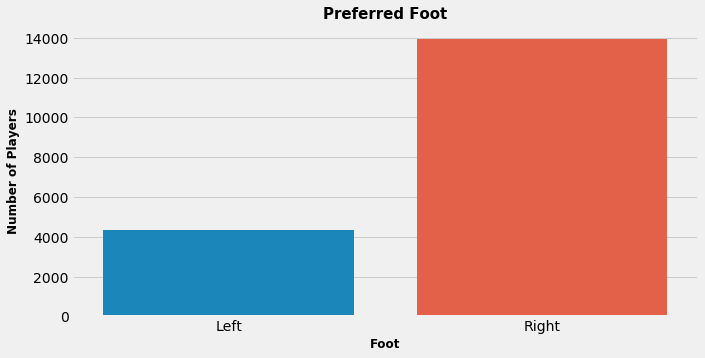

In [11]:
font = {'weight':'bold',
        'size': 12}

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(data['preferred_foot'])
plt.title("Preferred Foot",fontsize=15,fontdict=font)
plt.xlabel("Foot",fontdict=font)
plt.ylabel("Number of Players",fontdict=font)
plt.show()

In [12]:
data['weak_foot'].value_counts()

3    11347
2     3865
4     2666
5      245
1      155
Name: weak_foot, dtype: int64

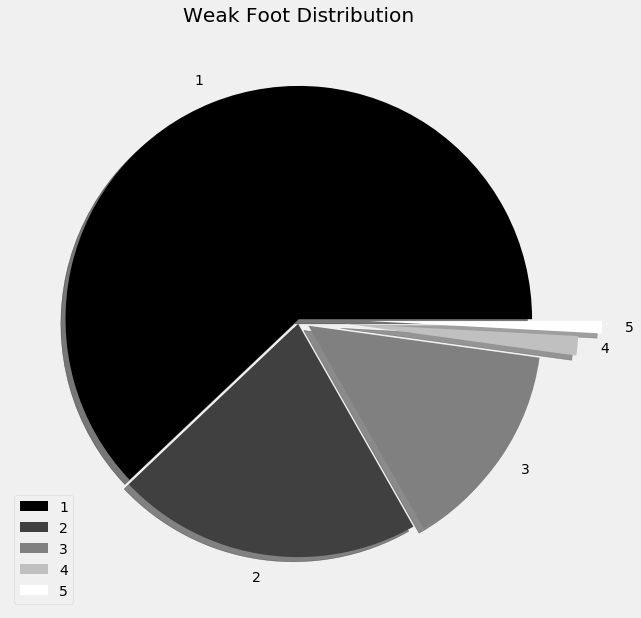

In [13]:
weak_foot = data['weak_foot'].value_counts()
labels = ['1','2','3','4','5']
explode = [0,0.02,0.05,0.2,0.3]
colour = plt.cm.binary_r(np.linspace(0,1,5))
plt.rcParams['figure.figsize'] = (10,10)

plt.pie(weak_foot, labels= labels, colors = colour, explode = explode, shadow=True)
plt.title("Weak Foot Distribution")
plt.legend()
plt.show()

### Comparing different positions for players 

<hr style="height:5px;background-color:black;">

**Only considering a player's main position**<br>
This helps disregard positions that players sometimes take up due to injuries or as backups.

In [14]:
data['player_positions'].value_counts()

CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
                ... 
CM, CB, CAM        1
LM, RB, CB         1
CB, CDM, CAM       1
ST, CAM, CM        1
RB, LW             1
Name: player_positions, Length: 643, dtype: int64

In [15]:
def get_positions(player_pos):
    return(player_pos.split(',')[0])

data['Positions'] = data['player_positions'].apply(lambda x: f"{get_positions(x)}")

In [16]:
data.Positions.value_counts()

CB     3162
ST     2582
CM     2193
GK     2036
CDM    1424
RB     1314
LB     1303
CAM    1146
RM     1050
LM     1049
LW      378
RW      369
CF      113
LWB      90
RWB      69
Name: Positions, dtype: int64

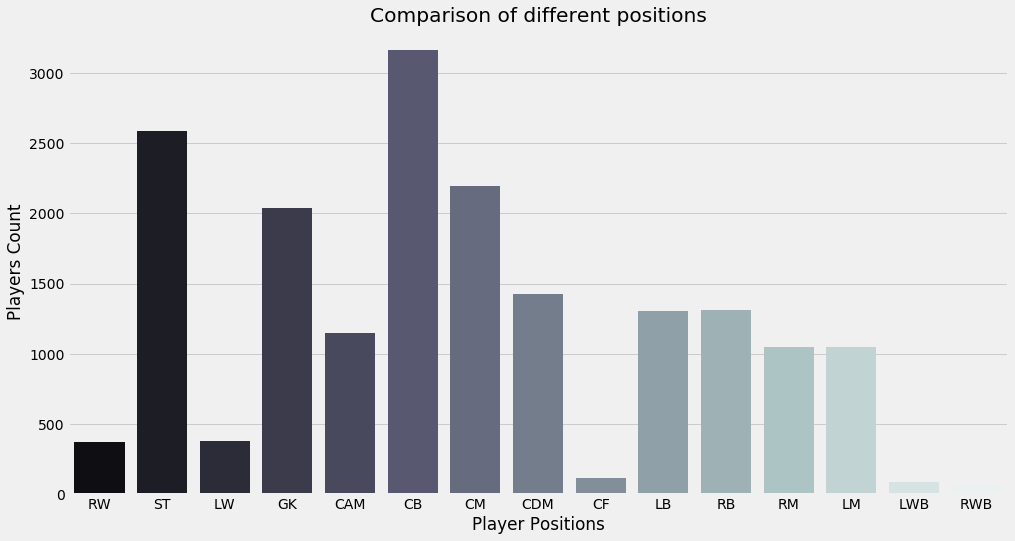

In [17]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(data.Positions, palette='bone')
plt.xlabel("Player Positions")
plt.ylabel("Players Count")
plt.title("Comparison of different positions")
plt.show()

### Plotting Players' Wage and Market values distributions

**Player Wages in Euros - Weekly**

In [18]:
data['wage_eur'].describe()

count     18278.000000
mean       9456.942773
std       21351.714095
min           0.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      565000.000000
Name: wage_eur, dtype: float64

##### Identifying the highest paid Footballer in 2020

In [39]:
highest_wages = '{}'.format(*data.loc[data['wage_eur'] == data['wage_eur'].max(),['short_name']].values[0])
highest_paid = f"{highest_wages}, {data['wage_eur'].max()} EUR"
highest_paid

'L. Messi, 565000 EUR'

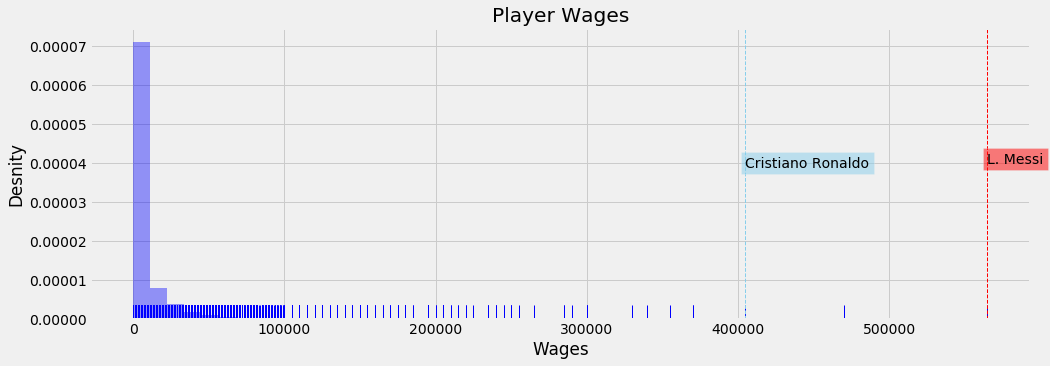

In [37]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,5))
sns.distplot(data['wage_eur'], color='blue', norm_hist=True,rug=True,kde=False)
plt.axvline(data['wage_eur'].max(), color='red', linestyle='dashed',linewidth=1.0)
plt.axvline(x=405000, color='skyblue',linestyle='dashed',linewidth=1.0)
plt.text(data['wage_eur'].max(),0.00004,s = highest_wages, bbox=dict(facecolor='red',alpha=0.5),withdash=True)
plt.text(x=405000, y=0.00004, s='Cristiano Ronaldo',bbox=dict(facecolor='skyblue',alpha=0.5),withdash=True,verticalalignment='center')
plt.xlabel('Wages')
plt.ylabel('Desnity')
plt.title("Player Wages")
plt.show()

In [22]:
data.loc[data['short_name']=='Cristiano Ronaldo']

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Positions
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,ST


In [40]:
data[data['wage_eur']==0]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Positions
327,E. Schetino,27,185,80,Uruguay,Uruguay,82,82,0,0,...,76+2,76+2,76+2,73+2,76+2,80+2,80+2,80+2,76+2,CB
328,J. Sildero,27,177,75,Uruguay,Uruguay,82,82,0,0,...,62+2,62+2,62+2,63+2,59+2,52+2,52+2,52+2,59+2,CAM
407,J. Frendado,35,181,82,Uruguay,Uruguay,81,81,0,0,...,72+2,72+2,72+2,69+2,72+2,80+2,80+2,80+2,72+2,CB
408,S. Ardero,31,171,63,Uruguay,Uruguay,81,81,0,0,...,53+2,53+2,53+2,57+2,51+2,39+2,39+2,39+2,51+2,CAM
409,L. Dálves,27,188,83,Uruguay,Uruguay,81,81,0,0,...,51+2,51+2,51+2,53+2,51+2,51+2,51+2,51+2,51+2,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16353,A. Varkay,33,179,71,India,India,58,58,0,0,...,56+2,56+2,56+2,57+2,57+2,57+2,57+2,57+2,57+2,LB
16354,C. Palan,28,181,69,India,India,58,58,0,0,...,59+2,59+2,59+2,60+2,61+2,61+2,61+2,61+2,61+2,CM
16356,H. Ivanov,37,176,65,Bulgaria,Bulgaria,58,58,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
16600,E. Ira Tape,21,192,85,Ivory Coast,Côte d'Ivoire,57,66,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


In [41]:
data['value_eur'].describe()

count    1.827800e+04
mean     2.484038e+06
std      5.585481e+06
min      0.000000e+00
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.055000e+08
Name: value_eur, dtype: float64

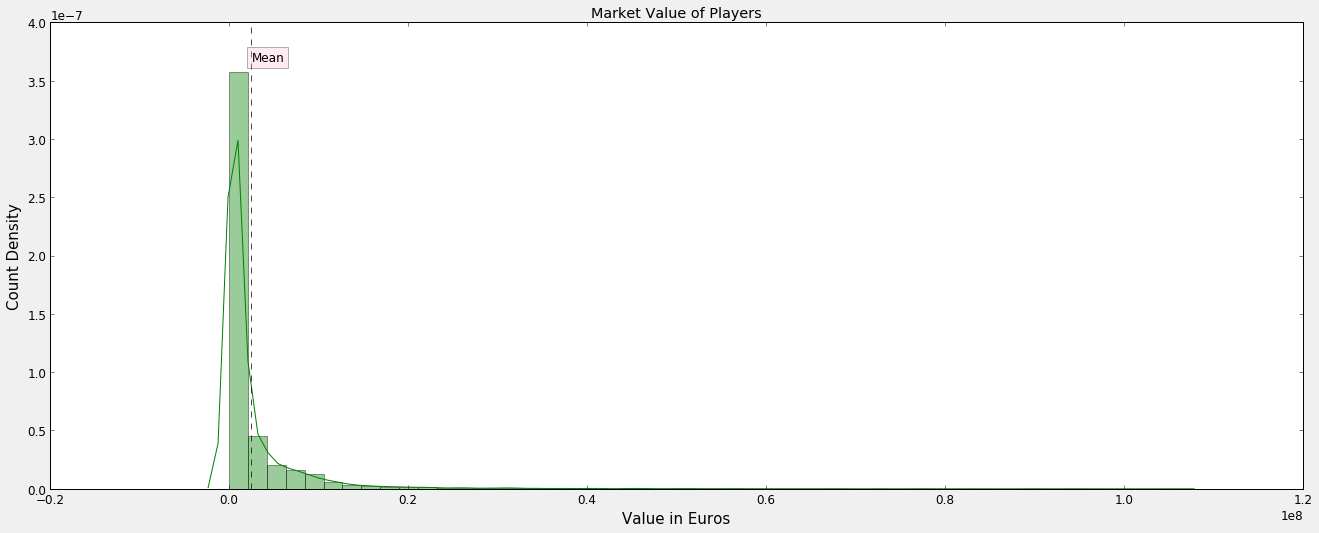

In [42]:
plt.figure(figsize=(20,8))

y_mean_pos = 3.75 / 10**7

plt.style.use('_classic_test')
sns.distplot(data['value_eur'], color='green',norm_hist=False)
plt.axvline(data['value_eur'].mean(),color='black',linewidth=0.7,linestyle='dashed')
plt.text(data['value_eur'].mean(),y_mean_pos,s='Mean',bbox=dict(facecolor='pink',alpha=0.3),verticalalignment='top')
plt.xlabel('Value in Euros',fontsize=15)
plt.ylabel('Count Density',fontsize=15)
plt.title("Market Value of Players")
plt.show()

In [43]:
data.overall.describe()

count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [44]:
data.potential.describe()

count    18278.000000
mean        71.546887
std          6.139669
min         49.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: potential, dtype: float64

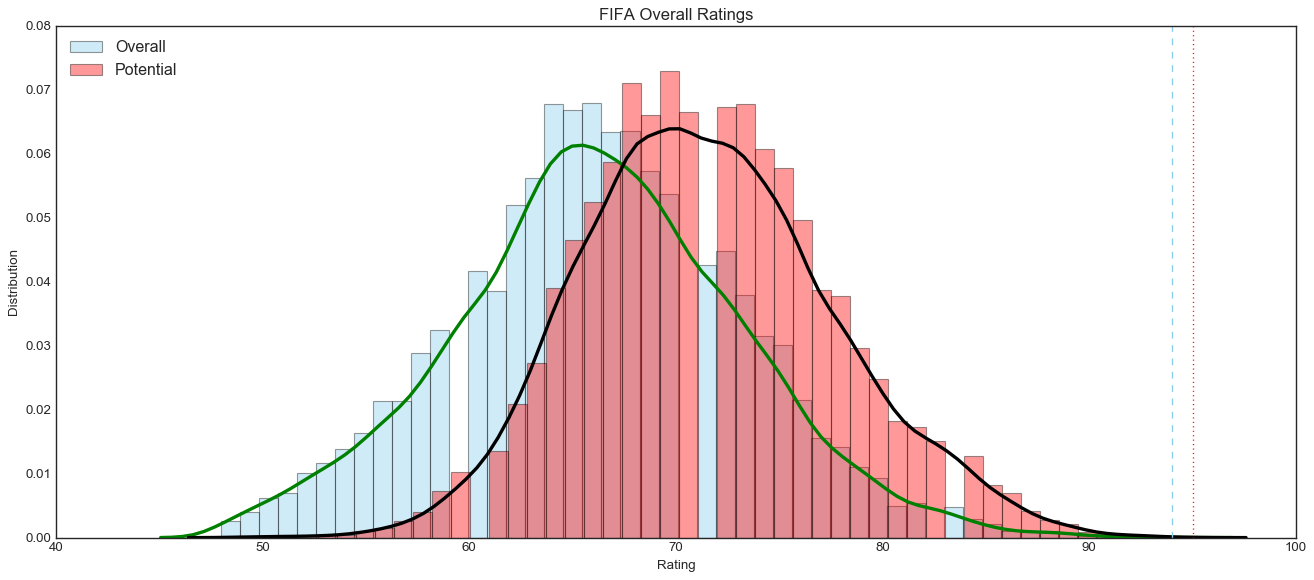

In [46]:
plt.figure(figsize=(20,8))
plt.style.use('seaborn-white')

max_potential = "{}".format(*data.loc[data['potential'] == data['potential'].max(),['short_name']].values[0])
max_overall = "{}".format(*data.loc[data['overall'] == data['overall'].max(),['short_name']].values[0])

sns.distplot(data.overall, bins=50,color='skyblue', norm_hist=False, kde_kws=dict(linewidth=3,color='green'),label='Overall')
sns.distplot(data.potential, bins=50,color='red', norm_hist=False, kde_kws=dict(linewidth=3,color='black'),label='Potential')
plt.axvline(data.overall.max(), color='skyblue',linewidth=1.2,linestyle='dashed')
plt.axvline(data.potential.max(), color='red',linewidth=1.2,linestyle='dotted')
# plt.text(max_overall, 0.12,s='Max ovr', bbox=dict(facecolor='teal',alpha=0.3),verticalalignment='center')
# plt.text(max_potential, 0.12,s='Max pot', bbox=dict(facecolor='olive',alpha=0.3),verticalalignment='top')
plt.title('FIFA Overall Ratings',fontsize=15)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
# plt.legend(loc="upper left",fancybox=True,frameon=True,facecolor='black')
plt.legend(loc='upper left')
plt.show()

In [50]:
print(max_potential,"\t",max_overall)

K. Mbappé 	 L. Messi


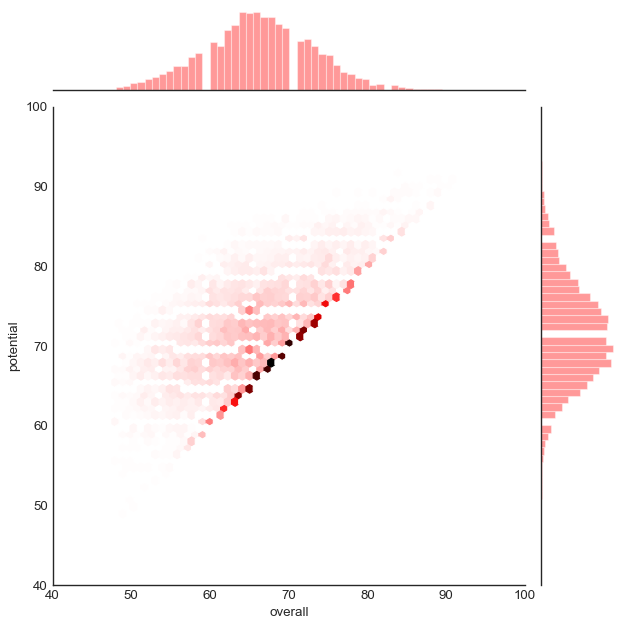

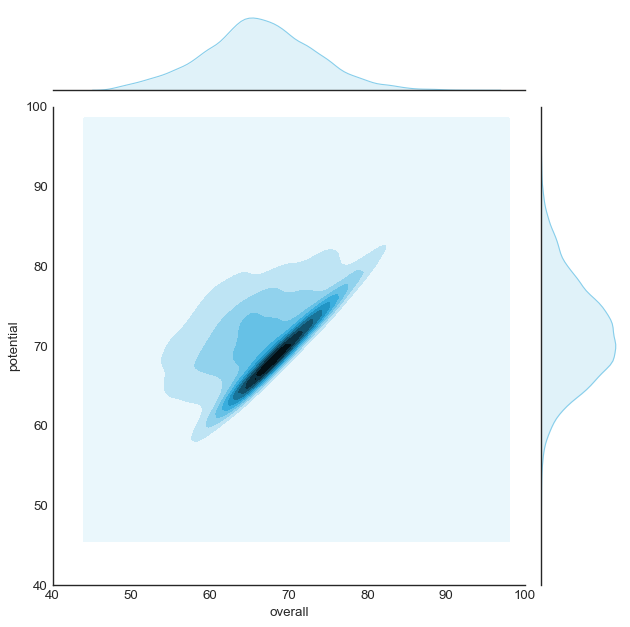

In [28]:
with sns.axes_style('white'):
    sns.jointplot(x=data.overall,y=data.potential, kind='hex', color='red',height=8)   
    sns.jointplot(x=data.overall,y=data.potential, kind='kde', color='skyblue',height=8) 


In [51]:
data.nationality.describe()

count       18278
unique        162
top       England
freq         1667
Name: nationality, dtype: object

In [52]:
top_countries = 
bottom_countries = data.nationality.value_counts().tail(82)

SyntaxError: invalid syntax (<ipython-input-52-42d48702030b>, line 1)

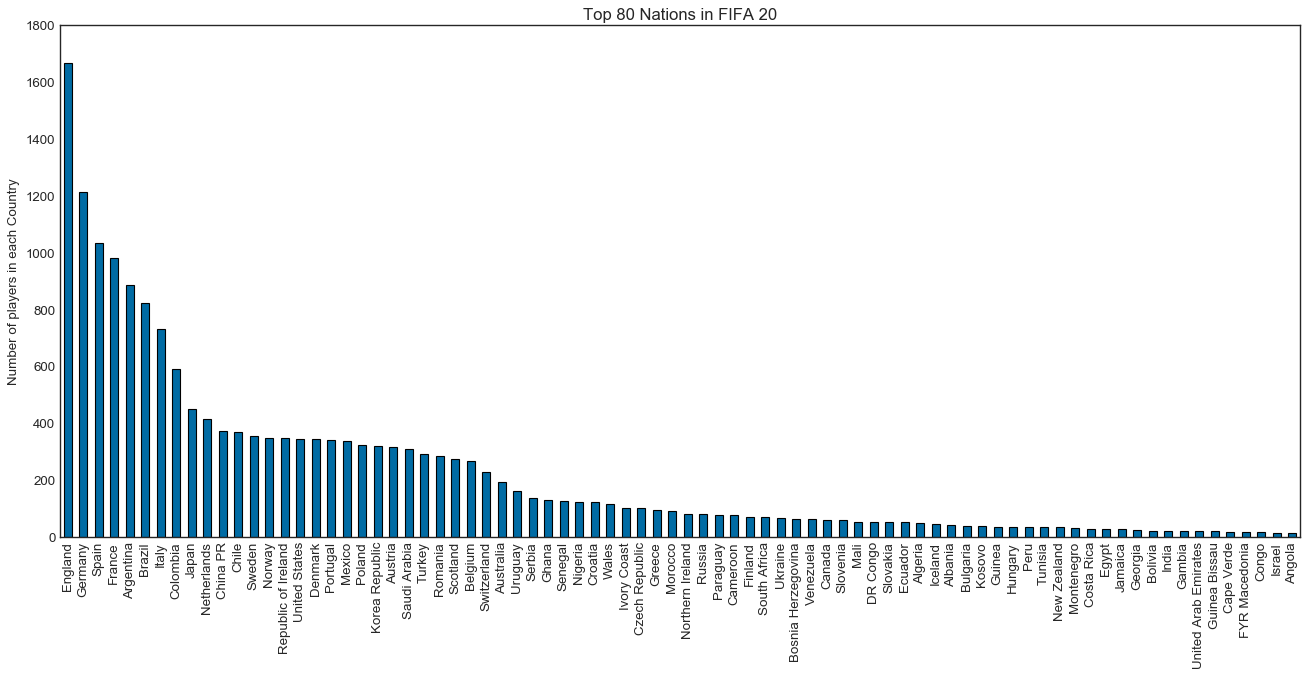

In [53]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,8))

data.nationality.value_counts().head(80).plot.bar()
plt.title("Top 80 Nations in FIFA 20",fontsize=15)
plt.ylabel("Number of players in each Country",fontsize=12)
# plt.axvline(data.nationality.value_counts()=="India")
plt.show()